In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [332]:
data = pd.read_csv("embedded_system_network_security_dataset.csv")
data.head()

,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,label,protocol_type_TCP,protocol_type_UDP,src_ip_192.168.1.2,src_ip_192.168.1.3,dst_ip_192.168.1.5,dst_ip_192.168.1.6,tcp_flags_FIN,tcp_flags_SYN,tcp_flags_SYN-ACK
0,0.405154,0.620362,62569,443,0.857143,0.0,0.834066,0.534891,0.0,False,True,True,False,False,False,False,False,False
1,0.527559,0.741288,59382,443,0.785714,0.0,0.147196,0.990757,0.0,False,True,False,False,False,True,False,True,False
2,0.226199,0.485116,65484,80,0.285714,0.0,0.855192,0.031781,0.0,False,True,False,False,True,False,False,False,False
3,0.573372,0.450965,51707,53,0.142857,0.0,0.153220,0.169958,0.0,False,False,False,True,False,False,False,False,False
4,0.651396,0.888740,26915,53,0.714286,0.0,0.923916,0.552053,0.0,True,False,False,True,False,False,False,True,False


In [333]:
data.shape

(1000, 18)

In [334]:
data.columns

Index(['packet_size', 'inter_arrival_time', 'src_port', 'dst_port',
       'packet_count_5s', 'mean_packet_size', 'spectral_entropy',
       'frequency_band_energy', 'label', 'protocol_type_TCP',
       'protocol_type_UDP', 'src_ip_192.168.1.2', 'src_ip_192.168.1.3',
       'dst_ip_192.168.1.5', 'dst_ip_192.168.1.6', 'tcp_flags_FIN',
       'tcp_flags_SYN', 'tcp_flags_SYN-ACK'],
      dtype='object')

In [335]:
data = data[["frequency_band_energy","inter_arrival_time","packet_count_5s","spectral_entropy","label"]]
data.head()

,frequency_band_energy,inter_arrival_time,packet_count_5s,spectral_entropy,label
0,0.534891,0.620362,0.857143,0.834066,0.0
1,0.990757,0.741288,0.785714,0.147196,0.0
2,0.031781,0.485116,0.285714,0.855192,0.0
3,0.169958,0.450965,0.142857,0.153220,0.0
4,0.552053,0.888740,0.714286,0.923916,0.0


In [336]:
normal_data = data[data["label"]==0].values
anomaly_data = data[data["label"]==1].values


In [337]:
np.random.shuffle(normal_data)
np.random.shuffle(anomaly_data)

In [338]:
n_train = int(0.6 * len(normal_data))
n_cv = int(0.2 * len(normal_data))

n_anomaly = int(0.5* len(anomaly_data))

In [339]:
X_train = normal_data[:n_train,:-1]
y_train = np.zeros(len(X_train))

In [340]:
X_cv = np.vstack((
    normal_data[n_train:n_train + n_cv,:-1],
    anomaly_data[:n_anomaly, :-1]
))

y_cv = np.hstack((
    np.zeros(n_cv),
    np.ones(n_anomaly)
))


In [341]:
idx = np.random.permutation(len(X_cv))
X_cv, y_cv = X_cv[idx], y_cv[idx]


In [342]:
X_test = np.vstack((
    normal_data[n_train+n_cv:, :-1],
    anomaly_data[n_anomaly:, :-1]
))

y_test = np.hstack((
    np.zeros(len(normal_data) - n_train - n_cv),
    np.ones(len(anomaly_data) - n_anomaly)
))

In [343]:
idx = np.random.permutation(len(X_test))
X_test, y_test = X_test[idx], y_test[idx]


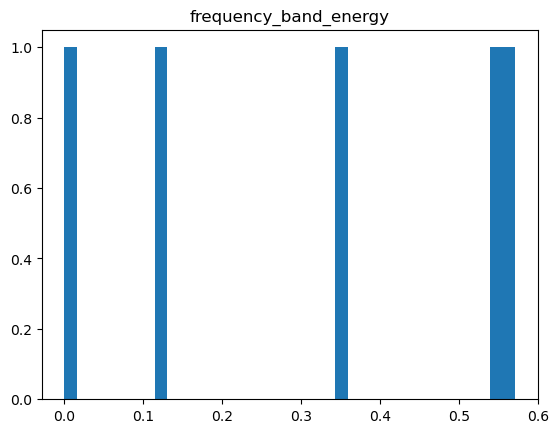

In [344]:
plt.hist(normal_data[0], bins=35)
plt.title("frequency_band_energy")
plt.show()

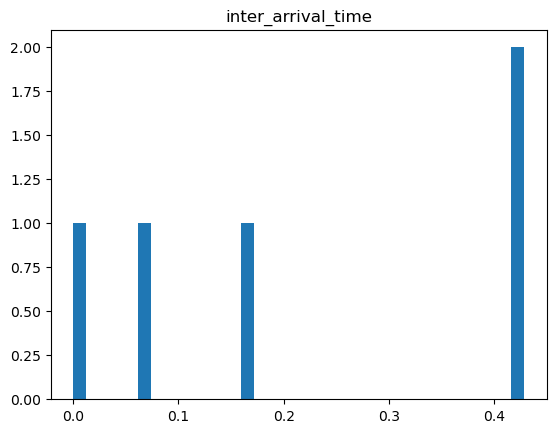

In [345]:
plt.hist(normal_data[1], bins=35)
plt.title("inter_arrival_time")
plt.show()

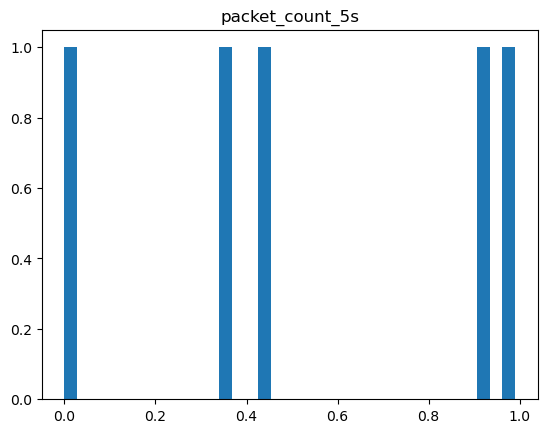

In [346]:
plt.hist(normal_data[2], bins=35)
plt.title("packet_count_5s")
plt.show()

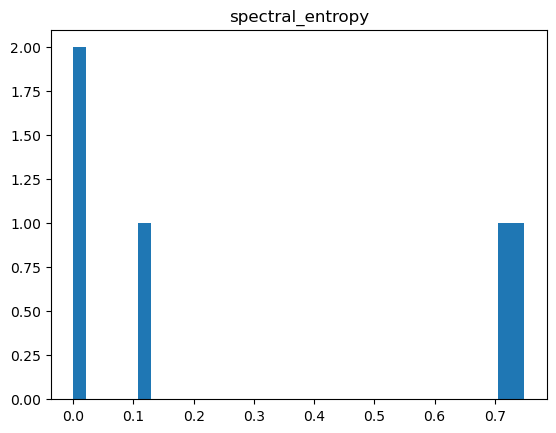

In [347]:
plt.hist(normal_data[3], bins=35)
plt.title("spectral_entropy")
plt.show()

In [348]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
eps = 1e-3               
std = np.maximum(std, eps)


In [349]:
def prob_x(X, mu, std):
    m, n = X.shape
    log_p_x = np.zeros(m)

    for i in range(m):
        s = 0.0
        for j in range(n):
            var = std[j] ** 2
            s += -0.5 * np.log(2 * np.pi * var)
            s += - (X[i, j] - mu[j])**2 / (2 * var)
        log_p_x[i] = s

    return log_p_x


In [350]:
log_p_train = prob_x(X_train, mean, std)

In [351]:
X_normal = normal_data[:, :-1]   
mean_normal = np.mean(X_normal,axis=0)
std_normal = np.std(X_normal,axis=0)
eps = 1e-3               
std_normal = np.maximum(std_normal, eps)

In [352]:
log_p_normal = prob_x(X_normal, mean_normal, std_normal)

In [353]:
X_anomaly = anomaly_data[:, :-1]
mean_a = np.mean(X_anomaly, axis=0)
std_a = np.std(X_anomaly, axis=0)
eps = 1e-3               
std_a = np.maximum(std_a, eps)

In [354]:
p_x_anomaly = prob_x(X_anomaly, mean_a, std_a )

In [355]:
cv_mu = np.mean(X_cv, axis=0)
cv_std = np.std(X_cv, axis=0)
eps = 1e-3               
cv_std = np.maximum(cv_std, eps)

In [356]:
log_p_cv = prob_x(X_cv,cv_mu,cv_std)

In [357]:
print("Shapes:", X_train.shape, X_cv.shape, X_test.shape)
print("mean_train:", mean)
print("std_train min/max:", std.min(), std.max())
print("log_p_train min/max:", log_p_train.min(), log_p_train.max())
print("log_p_cv  min/max:", log_p_cv.min(), log_p_cv.max())


Shapes: (540, 4) (230, 4) (230, 4)
mean_train: [0.47852632 0.52794095 0.52910053 0.49060187]
std_train min/max: 0.28309089918224356 0.30799945719247845
log_p_train min/max: -3.044723150271446 1.1452328159496525
log_p_cv  min/max: -3.4113950349491087 0.9819848678145779


In [358]:
# choose bottom X% as anomalies
percentiles = np.linspace(1, 20, 50)

best_f1 = -1
best_eps = None

for p in percentiles:
    eps = np.percentile(log_p_cv, p)
    y_pred = (log_p_cv < eps).astype(int)

    tp = np.sum((y_pred == 1) & (y_cv == 1))
    fp = np.sum((y_pred == 1) & (y_cv == 0))
    fn = np.sum((y_pred == 0) & (y_cv == 1))

    precision = tp / (tp + fp + 1e-9)
    recall    = tp / (tp + fn + 1e-9)
    f1 = 2 * precision * recall / (precision + recall + 1e-9)

    if f1 > best_f1:
        best_f1 = f1
        best_eps = eps

print("Best epsilon:", best_eps)
print("Best CV F1:", best_f1)


Best epsilon: -1.5454909530971754
Best CV F1: 0.21978021928028016


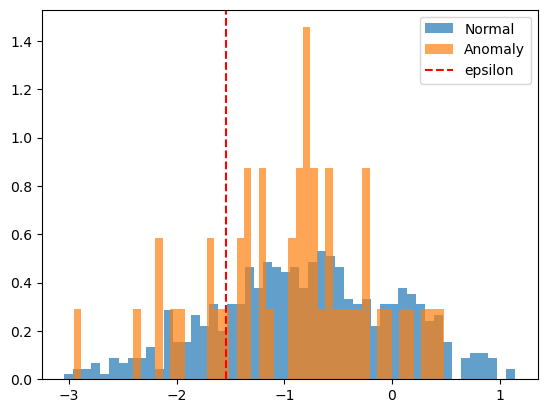

In [359]:
plt.hist(log_p_train, bins=50, alpha=0.7, label="Normal", density=True)
plt.hist(log_p_cv[y_cv==1], bins=50, alpha=0.7, label="Anomaly", density=True)
plt.axvline(best_eps, color='red', linestyle='--', label='epsilon')
plt.legend()
plt.show()


In [360]:
log_p_test = prob_x(X_test, mean, std)
y_test_pred = (log_p_test < best_eps).astype(int)

tp = np.sum((y_test_pred == 1) & (y_test == 1))
fp = np.sum((y_test_pred == 1) & (y_test == 0))
fn = np.sum((y_test_pred == 0) & (y_test == 1))

precision = tp / (tp + fp + 1e-9)
recall    = tp / (tp + fn + 1e-9)
f1 = 2 * precision * recall / (precision + recall + 1e-9)

print("TEST Precision:", precision)
print("TEST Recall   :", recall)
print("TEST F1       :", f1)


TEST Precision: 0.31428571427673474
TEST Recall   : 0.21999999999560002
TEST F1       : 0.2588235289212457
